In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random as rnd
%matplotlib inline

In [ ]:
train_df = pd.read_csv('/content/gdrive/MyDrive/Machine_Learning/ML_Competition/train.csv')
test_df = pd.read_csv('/content/gdrive/MyDrive/Machine_Learning/ML_Competition/test.csv')

#**Preprocess the data**

In [ ]:
print(train_df.columns.values)

['UID' 'col_0' 'col_1' 'col_2' 'col_3' 'col_4' 'col_5' 'col_6' 'y']


In [ ]:
print(test_df.columns.values)

['UID' 'col_0' 'col_1' 'col_2' 'col_3' 'col_4' 'col_5' 'col_6']


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2628 entries, 0 to 2627
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UID     2628 non-null   int64 
 1   col_0   2489 non-null   object
 2   col_1   2542 non-null   object
 3   col_2   2628 non-null   object
 4   col_3   2628 non-null   object
 5   col_4   2628 non-null   int64 
 6   col_5   2628 non-null   object
 7   col_6   2516 non-null   object
 8   y       2628 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 184.9+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UID     1127 non-null   int64 
 1   col_0   1060 non-null   object
 2   col_1   1093 non-null   object
 3   col_2   1127 non-null   object
 4   col_3   1127 non-null   object
 5   col_4   1127 non-null   int64 
 6   col_5   1127 non-null   object
 7   col_6   1079 non-null   object
dtypes: int64(2), object(6)
memory usage: 70.6+ KB


In [ ]:
train_df.head(10)

,UID,col_0,col_1,col_2,col_3,col_4,col_5,col_6,y
0,0,A 0,B0,C2,D1,100,E1,F2,237000
1,1,A1,B0,C11,D4,100,E4,F2,86193
2,2,A0,B0,C18,D0,0,E0,F2,169200
3,3,A2,B0,C11,D1,100,E1,F2,58000
4,4,A0,B0,C67,D1,0,E1,F2,235000
5,5,A0,B0,C11,D1,100,E1,F2,170000
6,6,AO,B0,C11,D1,100,E1,F0,183600
7,7,A0,B0,C4,D1,0,E1,F2,100000
8,8,A0,B0,C2,D1,100,E1,F2,175000
9,9,A0,B0,C2,D1,100,E1,F2,136000


In [ ]:
test_df.head(5)

,UID,col_0,col_1,col_2,col_3,col_4,col_5,col_6
0,2628,A0,B0,C11,D1,100,E1,F2
1,2629,A0,B0,C11,D1,0,E1,F2
2,2630,A0,B0,C11,D1,100,E1,F2
3,2631,A0,B0,C26,D1,100,E1,F0
4,2632,A0,B0,C11,D1,100,E1,NaN


In [ ]:
print("Training DataShape:",train_df.shape)

Training DataShape: (2628, 9)


In [ ]:
train_df.size

23652

In [ ]:
print("Testing DataShape:",test_df.shape)

Testing DataShape: (1127, 8)


In [ ]:
test_df.size

9016

In [ ]:
train_df.describe()

,UID,col_4,y
count,2628.000000,2628.000000,2628.000000
mean,1313.500000,46.308980,137642.657154
std,758.782578,48.558188,62886.926575
min,0.000000,0.000000,5132.000000
25%,656.750000,0.000000,95000.000000
50%,1313.500000,0.000000,135000.000000
75%,1970.250000,100.000000,176325.000000
max,2627.000000,100.000000,423000.000000


In [ ]:
test_df.describe()

,UID,col_4
count,1127.000000,1127.000000
mean,3191.000000,46.184561
std,325.481182,48.682405
min,2628.000000,0.000000
25%,2909.500000,0.000000
50%,3191.000000,0.000000
75%,3472.500000,100.000000
max,3754.000000,100.000000


In [ ]:
train_df.head(10)

,UID,col_0,col_1,col_2,col_3,col_4,col_5,col_6,y
0,0,A 0,B0,C2,D1,100,E1,F2,237000
1,1,A1,B0,C11,D4,100,E4,F2,86193
2,2,A0,B0,C18,D0,0,E0,F2,169200
3,3,A2,B0,C11,D1,100,E1,F2,58000
4,4,A0,B0,C67,D1,0,E1,F2,235000
5,5,A0,B0,C11,D1,100,E1,F2,170000
6,6,AO,B0,C11,D1,100,E1,F0,183600
7,7,A0,B0,C4,D1,0,E1,F2,100000
8,8,A0,B0,C2,D1,100,E1,F2,175000
9,9,A0,B0,C2,D1,100,E1,F2,136000


In [ ]:
test_df

,UID,col_0,col_1,col_2,col_3,col_4,col_5,col_6
0,2628,A0,B0,C11,D1,100,E1,F2
1,2629,A0,B0,C11,D1,0,E1,F2
2,2630,A0,B0,C11,D1,100,E1,F2
3,2631,A0,B0,C26,D1,100,E1,F0
4,2632,A0,B0,C11,D1,100,E1,NaN
...,...,...,...,...,...,...,...,...
1122,3750,A0,B0,C4,D1,100,E1,NaN
1123,3751,A1,B0,C34,D1,0,E1,F2
1124,3752,A2,B 0,C4,D1,0,E1,F2
1125,3753,A0,B0,C2,D1,100,E1,F2


In [ ]:
df_num = train_df[['col_4','y']]
df_cat = train_df[['col_0','col_1','col_2','col_3','col_5','col_6']]

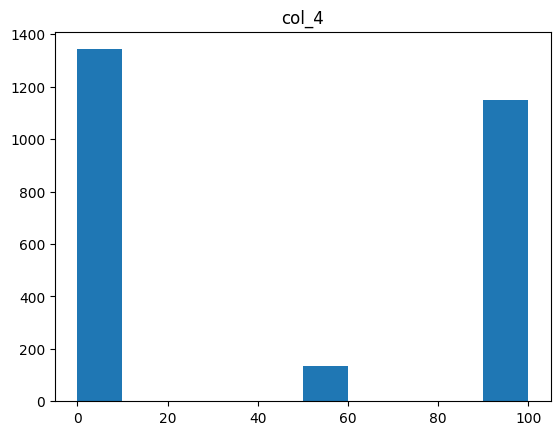

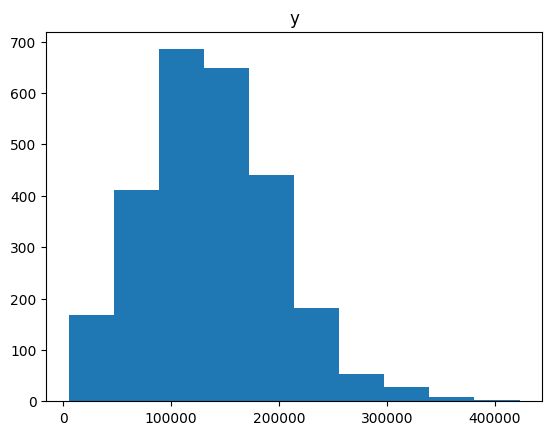

In [ ]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [ ]:
train_df['y'].value_counts()

120000    72
150000    69
100000    65
130000    59
160000    55
          ..
153667     1
104890     1
12888      1
117104     1
214000     1
Name: y, Length: 836, dtype: int64

In [ ]:
train_df.notnull()

,UID,col_0,col_1,col_2,col_3,col_4,col_5,col_6,y
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
2623,True,True,True,True,True,True,True,True,True
2624,True,True,True,True,True,True,True,True,True
2625,True,True,True,True,True,True,True,True,True
2626,True,True,True,True,True,True,True,True,True


In [ ]:
test_df.notnull()

,UID,col_0,col_1,col_2,col_3,col_4,col_5,col_6
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...
1122,True,True,True,True,True,True,True,False
1123,True,True,True,True,True,True,True,True
1124,True,True,True,True,True,True,True,True
1125,True,True,True,True,True,True,True,True


In [ ]:
train_df.isnull().sum()

UID        0
col_0    139
col_1     86
col_2      0
col_3      0
col_4      0
col_5      0
col_6    112
y          0
dtype: int64

In [ ]:
test_df.isnull().sum()

UID       0
col_0    67
col_1    34
col_2     0
col_3     0
col_4     0
col_5     0
col_6    48
dtype: int64

In [ ]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(13)

,Total,%
col_0,139,5.3
col_6,112,4.3
col_1,86,3.3
UID,0,0.0
col_2,0,0.0
col_3,0,0.0
col_4,0,0.0
col_5,0,0.0
y,0,0.0


In [ ]:
total = test_df.isnull().sum().sort_values(ascending=False)
percent_1 = test_df.isnull().sum()/test_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(13)

,Total,%
col_0,67,5.9
col_6,48,4.3
col_1,34,3.0
UID,0,0.0
col_2,0,0.0
col_3,0,0.0
col_4,0,0.0
col_5,0,0.0


In [ ]:
train_df['col_6'].value_counts()

F2        1976
F0         286
F1          97
F 2         46
F2          43
 F2         39
F0           7
F 0          6
 F0          6
FO           4
F 1          3
F1           2
 F1          1
Name: col_6, dtype: int64

In [ ]:
train_test_df = [train_df, test_df]

In [ ]:
train_test2=train_test_df

#**Columns 0**

In [ ]:
col_0_mapping = {
    " A0": 'A0',
    "A 0": 'A0',
    "AO": 'A0',
    " A1": 'A1',
    "A 1": 'A1',
    " A2": 'A2',
    "A 2": 'A2',
    " A3": 'A3',
    "A 3": 'A3',
    "A   3":'A3'
}

for dataset in train_test2:
    dataset['col_0'] = dataset['col_0'].str.strip()
    dataset['col_0'] = dataset['col_0'].map(col_0_mapping).fillna(dataset['col_0'])

In [ ]:
col_0_mapping = {"A0": 1, "A1": 2,"A2":3,"A3":4}
for dataset in train_test2:
    dataset['col_0'] = dataset['col_0'].map(col_0_mapping)

In [ ]:
for dataset in train_test2:

    median_col1 = dataset['col_0'].median()


    dataset['col_0'].fillna(median_col1, inplace=True)

In [ ]:
train_df['col_0'].value_counts()

1.0    1818
2.0     542
3.0     195
4.0      73
Name: col_0, dtype: int64

#**Columns 1**

In [ ]:
col_1_mapping = {
    " B0": 'B0',
    "B 0": 'B0',
    "BO": 'B0',
    "B   3":'B3'
}

for dataset in train_test2:
    dataset['col_1'] = dataset['col_1'].str.strip()
    dataset['col_1'] = dataset['col_1'].map(col_1_mapping).fillna(dataset['col_1'])

In [ ]:
col_1_mapping = {"B0": 1, "B1": 2,"B2":3,"B3":4}
for dataset in train_test2:
    dataset['col_1'] = dataset['col_1'].map(col_1_mapping)

In [ ]:
for dataset in train_test2:

    median_col1 = dataset['col_1'].median()


    dataset['col_1'].fillna(median_col1, inplace=True)

In [ ]:
train_df['col_0'].value_counts()

1.0    1818
2.0     542
3.0     195
4.0      73
Name: col_0, dtype: int64

#**Columns 6**

In [ ]:
col_6_mapping = {
    " F2": 'F2',
    "F 2": 'F2',
    "F 0": 'F0',
    " F0":'F0',
    "FO":'F0',
    "F 1":"F1",
    " F1":"F1"


}

for dataset in train_test2:
    dataset['col_6'] = dataset['col_6'].str.strip()
    dataset['col_6'] = dataset['col_6'].map(col_6_mapping).fillna(dataset['col_6'])

In [ ]:
col_6_mapping = {"F0": 1, "F1": 2,"F2":3}
for dataset in train_test2:
    dataset['col_6'] = dataset['col_6'].map(col_6_mapping)

In [ ]:
for dataset in train_test2:

    median_col1 = dataset['col_6'].median()


    dataset['col_6'].fillna(median_col1, inplace=True)

In [ ]:
train_df['col_6'].value_counts()

3.0    2216
1.0     309
2.0     103
Name: col_6, dtype: int64

#**Columns 2**

In [ ]:
import re


def extract_numbers(text):
    numbers = re.findall(r'\d+', text)
    return ''.join(numbers)


for dataset in train_test2:
    dataset['col_2'] = dataset['col_2'].apply(extract_numbers)





#**Columns 3**

In [ ]:



def extract_numbers(text):
    numbers = re.findall(r'\d+', text)
    return ''.join(numbers)


for dataset in train_test2:
    dataset['col_3'] = dataset['col_3'].apply(extract_numbers)

#**Columns 5**

In [ ]:

def extract_numbers(text):
    numbers = re.findall(r'\d+', text)
    return ''.join(numbers)


for dataset in train_test2:
    dataset['col_5'] = dataset['col_5'].apply(extract_numbers)


In [ ]:
for dataset in train_test2:

    dataset['col_5'] = pd.to_numeric(dataset['col_5'])


    median_value = np.nanmedian(dataset['col_5'][dataset['col_5'] != 0])


    dataset['col_5'].replace(0, median_value, inplace=True)

In [ ]:
train_df['col_4'].unique()

array([100,   0,  50])

In [ ]:
train_df['col_4'] = train_df['col_4'].replace(50, 0)


In [ ]:
train_df['col_4'].value_counts()

0      1479
100    1149
Name: col_4, dtype: int64

In [ ]:
train_df

,UID,col_0,col_1,col_2,col_3,col_4,col_5,col_6,y
0,0,1.0,1.0,2,1,100,1,3.0,237000
1,1,2.0,1.0,11,4,100,4,3.0,86193
2,2,1.0,1.0,18,0,0,1,3.0,169200
3,3,3.0,1.0,11,1,100,1,3.0,58000
4,4,1.0,1.0,67,1,0,1,3.0,235000
...,...,...,...,...,...,...,...,...,...
2623,2623,2.0,1.0,2,1,0,1,3.0,102100
2624,2624,1.0,1.0,8,1,0,1,3.0,129300
2625,2625,1.0,1.0,7,1,100,1,3.0,275300
2626,2626,1.0,1.0,11,1,100,1,3.0,150000


In [ ]:
train_df['col_2'].value_counts()

11    728
2     587
4     416
9     204
15     77
     ... 
62      1
63      1
92      1
76      1
66      1
Name: col_2, Length: 90, dtype: int64

In [ ]:
train_df['col_4'].value_counts()

0      1479
100    1149
Name: col_4, dtype: int64

#***Call the Fit Transformer For Train data set and Col_4***

In [ ]:

cols_to_scale = ['col_2']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_df[cols_to_scale] = scaler.fit_transform(train_df[cols_to_scale])


In [ ]:
train_df

,UID,col_0,col_1,col_2,col_3,col_4,col_5,col_6,y
0,0,1.0,1.0,0.021739,1,100,1,3.0,237000
1,1,2.0,1.0,0.119565,4,100,4,3.0,86193
2,2,1.0,1.0,0.195652,0,0,1,3.0,169200
3,3,3.0,1.0,0.119565,1,100,1,3.0,58000
4,4,1.0,1.0,0.728261,1,0,1,3.0,235000
...,...,...,...,...,...,...,...,...,...
2623,2623,2.0,1.0,0.021739,1,0,1,3.0,102100
2624,2624,1.0,1.0,0.086957,1,0,1,3.0,129300
2625,2625,1.0,1.0,0.076087,1,100,1,3.0,275300
2626,2626,1.0,1.0,0.119565,1,100,1,3.0,150000


#**Call the Fit Transformer For Test data set and Col_4**

In [ ]:
cols_to_scale = ['col_2']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

test_df[cols_to_scale] = scaler.fit_transform(test_df[cols_to_scale])


"cols_to_scale = ['col_2','col_3','col_5']\n\nfrom sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\n\ntest_df[cols_to_scale] = scaler.fit_transform(test_df[cols_to_scale])"

In [ ]:
train_df.head(10)

,UID,col_0,col_1,col_2,col_3,col_4,col_5,col_6,y
0,0,1.0,1.0,0.021739,1,100,1,3.0,237000
1,1,2.0,1.0,0.119565,4,100,4,3.0,86193
2,2,1.0,1.0,0.195652,0,0,1,3.0,169200
3,3,3.0,1.0,0.119565,1,100,1,3.0,58000
4,4,1.0,1.0,0.728261,1,0,1,3.0,235000
5,5,1.0,1.0,0.119565,1,100,1,3.0,170000
6,6,1.0,1.0,0.119565,1,100,1,1.0,183600
7,7,1.0,1.0,0.043478,1,0,1,3.0,100000
8,8,1.0,1.0,0.021739,1,100,1,3.0,175000
9,9,1.0,1.0,0.021739,1,100,1,3.0,136000


In [ ]:
test_df['col_3'].value_counts()

1     911
4      51
2      25
0      19
6      17
12     15
3      14
8       8
37      6
41      5
13      5
9       4
33      4
26      3
16      3
64      3
19      2
25      2
39      2
57      2
24      1
17      1
5       1
11      1
23      1
42      1
20      1
61      1
10      1
22      1
45      1
63      1
18      1
29      1
52      1
62      1
74      1
55      1
15      1
48      1
69      1
43      1
46      1
44      1
67      1
70      1
Name: col_3, dtype: int64

In [ ]:
for dataset in train_test2:

    dataset['col_3'] = pd.to_numeric(dataset['col_3'])


    median_value = np.nanmedian(dataset['col_3'][dataset['col_3'] != 0])


    dataset['col_3'].replace(0, median_value, inplace=True)

#**Feature Correlation Matrix**

In [ ]:
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np
import pandas as pd

corr_matrix1 = train_df.corr()
train_df.corr()

,UID,col_0,col_1,col_2,col_3,col_4,col_5,col_6,y
UID,1.000000,-0.028423,0.024496,0.005914,-0.018726,0.031175,-0.009065,0.041175,-0.013059
col_0,-0.028423,1.000000,0.128735,0.115630,0.206799,-0.022767,0.190651,-0.199806,-0.221088
col_1,0.024496,0.128735,1.000000,0.076695,0.223578,0.023376,0.134787,-0.086231,-0.120560
col_2,0.005914,0.115630,0.076695,1.000000,0.169302,0.031487,0.155502,-0.179819,-0.076771
col_3,-0.018726,0.206799,0.223578,0.169302,1.000000,0.047349,0.810247,-0.260833,-0.315483
col_4,0.031175,-0.022767,0.023376,0.031487,0.047349,1.000000,0.021588,-0.055607,0.002532
col_5,-0.009065,0.190651,0.134787,0.155502,0.810247,0.021588,1.000000,-0.244831,-0.314331
col_6,0.041175,-0.199806,-0.086231,-0.179819,-0.260833,-0.055607,-0.244831,1.000000,0.171960
y,-0.013059,-0.221088,-0.120560,-0.076771,-0.315483,0.002532,-0.314331,0.171960,1.000000


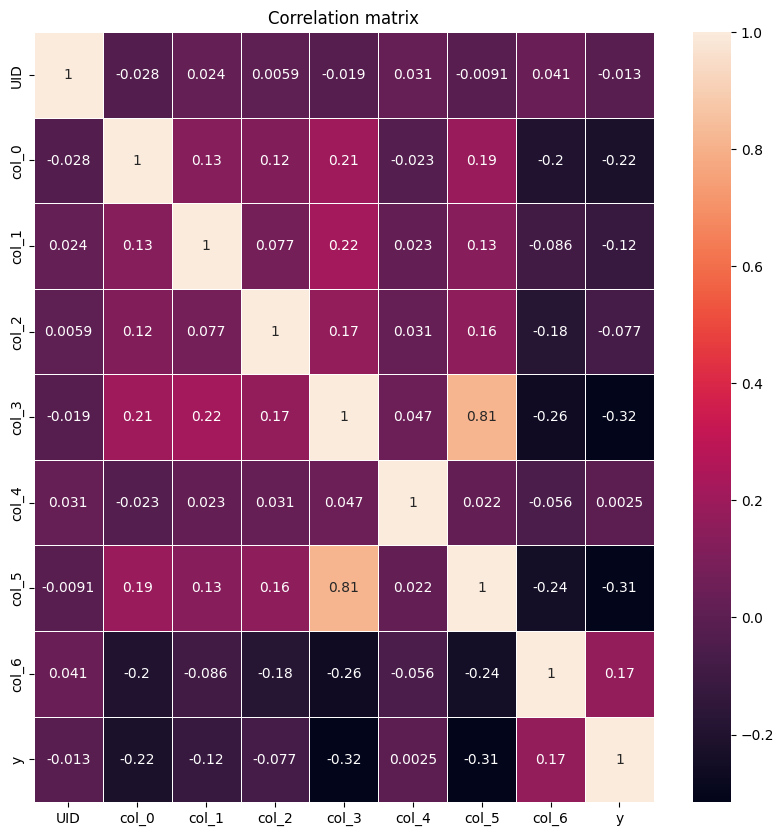

In [ ]:
corr = train_df.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr, annot=True, linewidth=0.5)
ax.set_title("Correlation matrix")
plt.show()

In [ ]:
corr_matrix1["y"].sort_values(ascending=False)

y        1.000000
col_6    0.171960
col_4    0.002532
UID     -0.013059
col_2   -0.076771
col_1   -0.120560
col_0   -0.221088
col_5   -0.314331
col_3   -0.315483
Name: y, dtype: float64

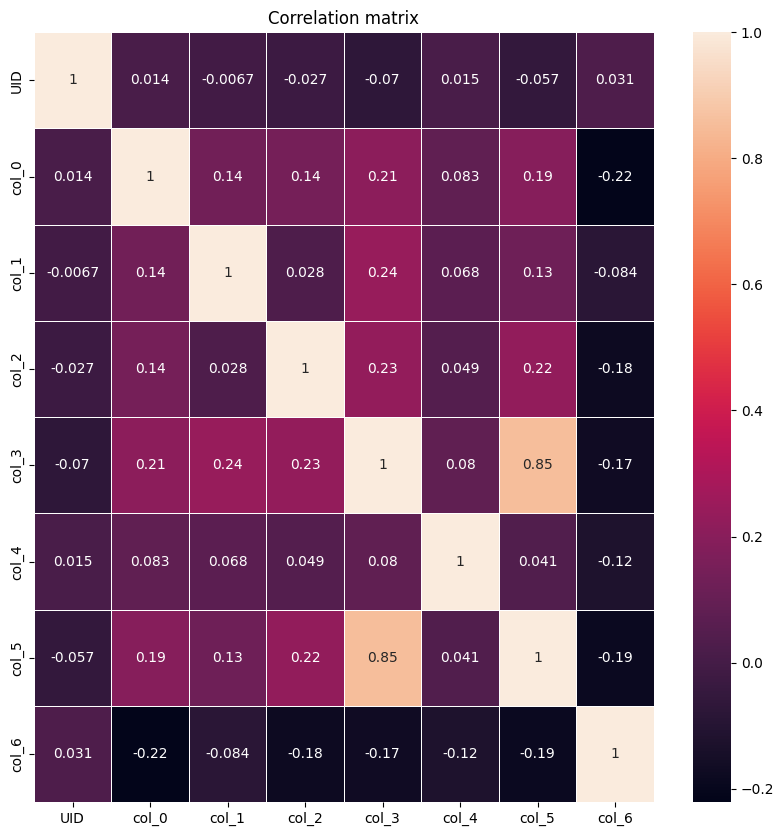

In [ ]:
corr = test_df.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr, annot=True, linewidth=0.5)
ax.set_title("Correlation matrix")
plt.show()

In [ ]:
test_df


,UID,col_0,col_1,col_2,col_3,col_4,col_5,col_6
0,2628,1.0,1.0,0.126437,1,100,1,3.0
1,2629,1.0,1.0,0.126437,1,0,1,3.0
2,2630,1.0,1.0,0.126437,1,100,1,3.0
3,2631,1.0,1.0,0.298851,1,100,1,1.0
4,2632,1.0,1.0,0.126437,1,100,1,3.0
...,...,...,...,...,...,...,...,...
1122,3750,1.0,1.0,0.045977,1,100,1,3.0
1123,3751,2.0,1.0,0.390805,1,0,1,3.0
1124,3752,3.0,1.0,0.045977,1,0,1,3.0
1125,3753,1.0,1.0,0.022989,1,100,1,3.0


In [ ]:
train_df

,UID,col_0,col_1,col_2,col_3,col_4,col_5,col_6,y
0,0,1.0,1.0,0.021739,1,100,1,3.0,237000
1,1,2.0,1.0,0.119565,4,100,4,3.0,86193
2,2,1.0,1.0,0.195652,1,0,1,3.0,169200
3,3,3.0,1.0,0.119565,1,100,1,3.0,58000
4,4,1.0,1.0,0.728261,1,0,1,3.0,235000
...,...,...,...,...,...,...,...,...,...
2623,2623,2.0,1.0,0.021739,1,0,1,3.0,102100
2624,2624,1.0,1.0,0.086957,1,0,1,3.0,129300
2625,2625,1.0,1.0,0.076087,1,100,1,3.0,275300
2626,2626,1.0,1.0,0.119565,1,100,1,3.0,150000


#**Drop Target Variable Y**

In [ ]:
train_df2 = train_df.drop('y', axis=1)
target = train_df['y']
train_df2.shape, target.shape

((2628, 8), (2628,))

In [ ]:
train_df2

,UID,col_0,col_1,col_2,col_3,col_4,col_5,col_6
0,0,1.0,1.0,0.021739,1,100,1,3.0
1,1,2.0,1.0,0.119565,4,100,4,3.0
2,2,1.0,1.0,0.195652,1,0,1,3.0
3,3,3.0,1.0,0.119565,1,100,1,3.0
4,4,1.0,1.0,0.728261,1,0,1,3.0
...,...,...,...,...,...,...,...,...
2623,2623,2.0,1.0,0.021739,1,0,1,3.0
2624,2624,1.0,1.0,0.086957,1,0,1,3.0
2625,2625,1.0,1.0,0.076087,1,100,1,3.0
2626,2626,1.0,1.0,0.119565,1,100,1,3.0


In [ ]:
df=train_df2
df1=test_df

In [ ]:
df

,UID,col_0,col_1,col_2,col_3,col_4,col_5,col_6
0,0,1.0,1.0,0.021739,1,100,1,3.0
1,1,2.0,1.0,0.119565,4,100,4,3.0
2,2,1.0,1.0,0.195652,1,0,1,3.0
3,3,3.0,1.0,0.119565,1,100,1,3.0
4,4,1.0,1.0,0.728261,1,0,1,3.0
...,...,...,...,...,...,...,...,...
2623,2623,2.0,1.0,0.021739,1,0,1,3.0
2624,2624,1.0,1.0,0.086957,1,0,1,3.0
2625,2625,1.0,1.0,0.076087,1,100,1,3.0
2626,2626,1.0,1.0,0.119565,1,100,1,3.0


In [ ]:
df['col_0'].value_counts()

1.0    1818
2.0     542
3.0     195
4.0      73
Name: col_0, dtype: int64

#**Drop the columns**

In [ ]:
df.drop(['col_1','col_4','col_6'],axis=1,inplace=True)



In [ ]:
df1.drop(['col_1','col_4','col_6'],axis=1,inplace=True)

In [ ]:
df

,UID,col_0,col_2,col_3,col_5
0,0,1.0,0.021739,1,1
1,1,2.0,0.119565,4,4
2,2,1.0,0.195652,1,1
3,3,3.0,0.119565,1,1
4,4,1.0,0.728261,1,1
...,...,...,...,...,...
2623,2623,2.0,0.021739,1,1
2624,2624,1.0,0.086957,1,1
2625,2625,1.0,0.076087,1,1
2626,2626,1.0,0.119565,1,1


In [ ]:
feature = ['col_0', 'col_2', 'col_3', 'col_5' ]
x_train = df[feature]
x_test = df1[feature]
y_train = train_df['y']

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)


submission1 = test_df[['UID']]
submission1['y'] = predictions


submission1.to_csv('/content/gdrive/MyDrive/Machine_Learning/ML_Competition/submission1.csv', index=False)

<ipython-input-76-34ed5d717e12>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission1['y'] = predictions


In [ ]:
submission1

,UID,y
0,2628,148740.919715
1,2629,148740.919715
2,2630,148740.919715
3,2631,148206.665581
4,2632,148740.919715
...,...,...
1122,3750,148990.238311
1123,3751,134636.857397
1124,3752,122420.493018
1125,3753,149061.472195


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)


submission2 = test_df[['UID']]
submission2['y'] = predictions


submission2.to_csv('/content/gdrive/MyDrive/Machine_Learning/ML_Competition/submission2.csv', index=False)

In [ ]:
submission2

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)


submission4 = test_df[['UID']]
submission4['y'] = predictions


submission3.to_csv('/content/gdrive/MyDrive/Machine_Learning/ML_Competition/submission3.csv', index=False)

In [ ]:
 submission3

In [ ]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3
)
model.fit(x_train, y_train)
predictions = model.predict(x_test)


submission4 = test_df[['UID']]
submission4['y'] = predictions


submission4.to_csv('/content/gdrive/MyDrive/Machine_Learning/ML_Competition/submission4.csv', index=False)

<ipython-input-78-481930b21bad>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission4['y'] = predictions


In [ ]:
submission4

,UID,y
0,2628,173780.359375
1,2629,173780.359375
2,2630,173780.359375
3,2631,149222.875000
4,2632,173780.359375
...,...,...
1122,3750,127200.570312
1123,3751,134111.343750
1124,3752,82701.382812
1125,3753,159897.406250
